In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as  sk

In [ ]:
data = pd.read_excel('data_gabungan_final_2.xlsx')
data

,Provinsi,Persen_Buta_Huruf,Jumlah_Buta_Huruf,Jumlah Sekolah SMA (Negeri+Swasta),Jumlah Guru SMA (Negeri+Swasta),Jumlah Murid SMA (Negeri+Swasta),Jumlah Sekolah SMP (Negeri+Swasta),Jumlah Guru SMP (Negeri+Swasta),Jumlah Murid SMP (Negeri+Swasta),Jumlah Sekolah SD (Negeri+Swasta),Jumlah Guru SD (Negeri+Swasta),Jumlah Murid SD (Negeri+Swasta)
0,ACEH,1.66,93391,539,14056,137657,1328,24328,207964,3543,49993,494082
1,SUMATERA UTARA,0.91,143650,1067,24402,389899,2709,45871,625135,9747,113295,1496473
2,SUMATERA BARAT,0.63,37260,338,11140,153535,865,18146,204214,4219,49301,585597
3,RIAU,0.80,54489,467,12373,172295,1309,21916,269138,3837,54359,772873
4,JAMBI,1.98,74616,247,6131,81429,720,11664,121809,2474,29088,367826
5,SUMATERA SELATAN,1.32,117856,613,15456,220114,1463,26314,359282,4739,61446,883181
6,BENGKULU,2.09,44684,151,4287,54694,460,8794,85551,1408,17697,194713
7,LAMPUNG,2.64,251404,527,11705,172818,1483,24336,342821,4742,57654,797968
8,KEPULAUAN BANGKA BELITUNG,1.80,27914,74,1828,31454,238,3903,64771,832,9824,159654
9,KEPULAUAN RIAU,0.80,17708,168,3782,57275,424,6558,102428,988,14383,227824


In [ ]:
def safe_div(num, den):
    num = pd.to_numeric(num, errors='coerce')
    den = pd.to_numeric(den, errors='coerce')
    out = num / den
    return out.replace([np.inf, -np.inf], np.nan)

# Rasio guru–murid
data['Rasio_Guru_Murid_SD']  = safe_div(data['Jumlah Guru SD (Negeri+Swasta)'],  data['Jumlah Murid SD (Negeri+Swasta)'])
data['Rasio_Guru_Murid_SMP'] = safe_div(data['Jumlah Guru SMP (Negeri+Swasta)'], data['Jumlah Murid SMP (Negeri+Swasta)'])
data['Rasio_Guru_Murid_SMA'] = safe_div(data['Jumlah Guru SMA (Negeri+Swasta)'], data['Jumlah Murid SMA (Negeri+Swasta)'])

# Rasio sekolah–murid
data['Rasio_Sekolah_Murid_SD']  = safe_div(data['Jumlah Sekolah SD (Negeri+Swasta)'],  data['Jumlah Murid SD (Negeri+Swasta)'])
data['Rasio_Sekolah_Murid_SMP'] = safe_div(data['Jumlah Sekolah SMP (Negeri+Swasta)'], data['Jumlah Murid SMP (Negeri+Swasta)'])
data['Rasio_Sekolah_Murid_SMA'] = safe_div(data['Jumlah Sekolah SMA (Negeri+Swasta)'], data['Jumlah Murid SMA (Negeri+Swasta)'])

In [ ]:
fitur = [
    'Rasio_Guru_Murid_SD', 'Rasio_Guru_Murid_SMP', 'Rasio_Guru_Murid_SMA',
    'Rasio_Sekolah_Murid_SD', 'Rasio_Sekolah_Murid_SMP', 'Rasio_Sekolah_Murid_SMA',

]
X = data[fitur]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
data['Cluster'] = labels


In [ ]:
# Tampilkan provinsi per cluster
for c in sorted(data['Cluster'].unique()):
    print(f"\n=== Cluster {c} ===")
    print(data.loc[data['Cluster'] == c, ['Provinsi', 'Rasio_Guru_Murid_SD', 'Rasio_Sekolah_Murid_SD']])



=== Cluster 0 ===
              Provinsi  Rasio_Guru_Murid_SD  Rasio_Sekolah_Murid_SD
1       SUMATERA UTARA             0.075708                0.006513
2       SUMATERA BARAT             0.084189                0.007205
3                 RIAU             0.070334                0.004965
4                JAMBI             0.079081                0.006726
5     SUMATERA SELATAN             0.069574                0.005366
6             BENGKULU             0.090888                0.007231
7              LAMPUNG             0.072251                0.005943
13       DI YOGYAKARTA             0.075790                0.006914
14          JAWA TIMUR             0.072724                0.007585
19    KALIMANTAN BARAT             0.073966                0.007981
21  KALIMANTAN SELATAN             0.086634                0.008326
23    KALIMANTAN UTARA             0.076838                0.006020
26    SULAWESI SELATAN             0.080777                0.007338
32         PAPUA BARAT       

In [ ]:
print(data.groupby('Cluster')[['Rasio_Guru_Murid_SD', 'Rasio_Sekolah_Murid_SD', 'Jumlah_Buta_Huruf']].mean())


         Rasio_Guru_Murid_SD  Rasio_Sekolah_Murid_SD  Jumlah_Buta_Huruf
Cluster                                                                
0                   0.077052                0.006891      288686.866667
1                   0.094175                0.008663      107161.000000
2                   0.053312                0.004876      367593.727273


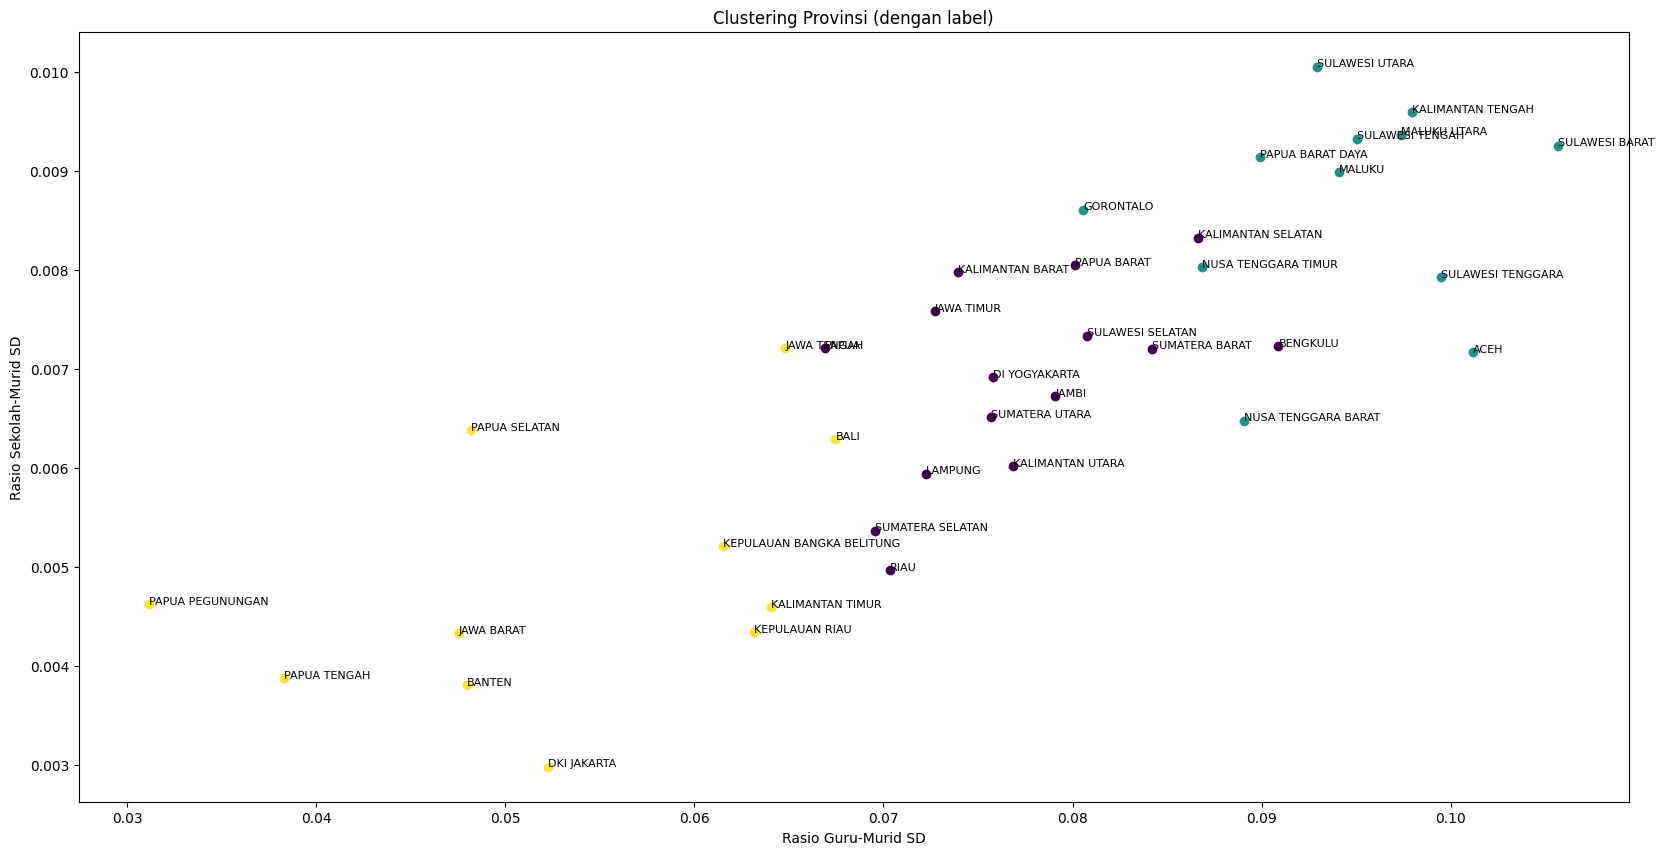

In [ ]:


plt.figure(figsize=(20,10))
for i in data.index:
    plt.scatter(data.loc[i, 'Rasio_Guru_Murid_SD'], data.loc[i, 'Rasio_Sekolah_Murid_SD'], c=[[plt.cm.viridis(data.loc[i, 'Cluster']/data['Cluster'].max())]])
    plt.text(data.loc[i, 'Rasio_Guru_Murid_SD'], data.loc[i, 'Rasio_Sekolah_Murid_SD'], data.loc[i, 'Provinsi'], fontsize=8)
plt.xlabel('Rasio Guru-Murid SD')
plt.ylabel('Rasio Sekolah-Murid SD')
plt.title('Clustering Provinsi (dengan label)')
plt.show()


In [ ]:
print(data[data['Provinsi'] == 'DKI JAKARTA'][['Rasio_Guru_Murid_SD', 'Rasio_Sekolah_Murid_SD', 'Jumlah Guru SD (Negeri+Swasta)', 'Jumlah Murid SD (Negeri+Swasta)', 'Jumlah Sekolah SD (Negeri+Swasta)']])


    Rasio_Guru_Murid_SD  Rasio_Sekolah_Murid_SD  \
10             0.052246                0.002979   

    Jumlah Guru SD (Negeri+Swasta)  Jumlah Murid SD (Negeri+Swasta)  \
10                           38987                           746219   

    Jumlah Sekolah SD (Negeri+Swasta)  
10                               2223  


In [ ]:
# Clustering fitur SMP
fitur_smp = ['Rasio_Guru_Murid_SMP', 'Rasio_Sekolah_Murid_SMP']
X_smp = data[fitur_smp]

# Scaling
scaler_smp = StandardScaler()
X_smp_scaled = scaler_smp.fit_transform(X_smp)

# K-Means
kmeans_smp = KMeans(n_clusters=3, random_state=42)
labels_smp = kmeans_smp.fit_predict(X_smp_scaled)
data['Cluster_SMP'] = labels_smp

# Tampilkan provinsi per cluster SMP
for c in sorted(data['Cluster_SMP'].unique()):
    print(f"\n=== Cluster SMP {c} ===")
    print(data.loc[data['Cluster_SMP'] == c, ['Provinsi', 'Rasio_Guru_Murid_SMP', 'Rasio_Sekolah_Murid_SMP']])

# Statistik cluster SMP
print(data.groupby('Cluster_SMP')[['Rasio_Guru_Murid_SMP', 'Rasio_Sekolah_Murid_SMP', 'Jumlah_Buta_Huruf']].mean())





=== Cluster SMP 0 ===
                     Provinsi  Rasio_Guru_Murid_SMP  Rasio_Sekolah_Murid_SMP
1              SUMATERA UTARA              0.073378                 0.004333
5            SUMATERA SELATAN              0.073241                 0.004072
7                     LAMPUNG              0.070987                 0.004326
8   KEPULAUAN BANGKA BELITUNG              0.060258                 0.003674
9              KEPULAUAN RIAU              0.064025                 0.004139
10                DKI JAKARTA              0.054889                 0.003011
11                 JAWA BARAT              0.052204                 0.003252
12                JAWA TENGAH              0.057126                 0.002835
13              DI YOGYAKARTA              0.066575                 0.003453
14                 JAWA TIMUR              0.064311                 0.004064
15                     BANTEN              0.052793                 0.003571
16                       BALI              0.058783  

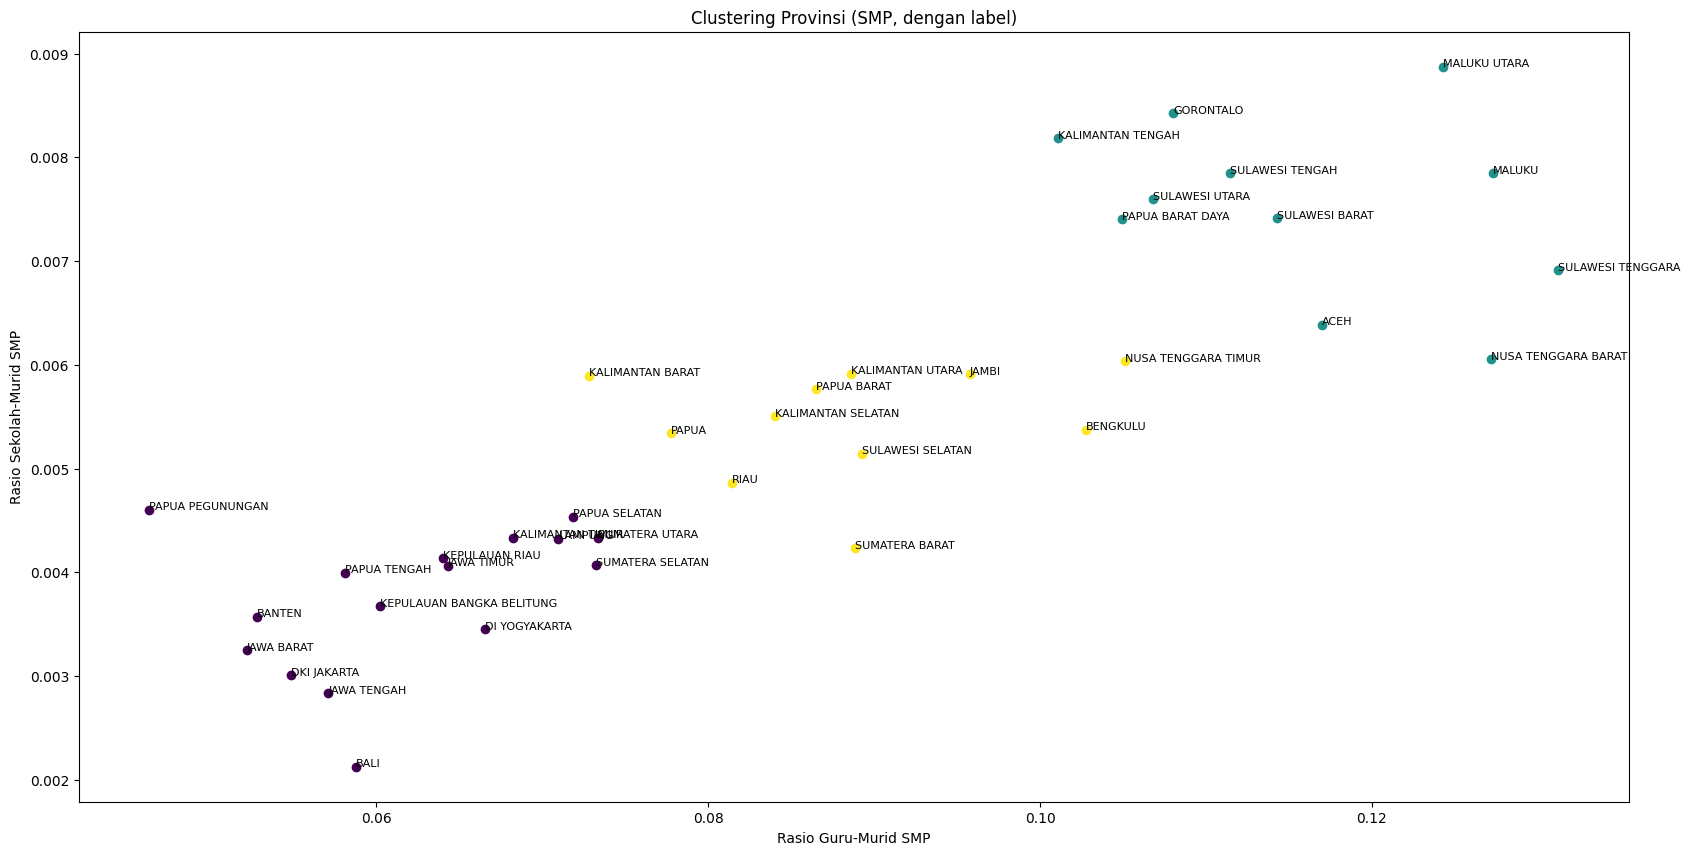

In [ ]:
# Visualisasi cluster SMP
plt.figure(figsize=(20,10))
for i in data.index:
    plt.scatter(data.loc[i, 'Rasio_Guru_Murid_SMP'], data.loc[i, 'Rasio_Sekolah_Murid_SMP'],
                c=[[plt.cm.viridis(data.loc[i, 'Cluster_SMP']/data['Cluster_SMP'].max())]])
    plt.text(data.loc[i, 'Rasio_Guru_Murid_SMP'], data.loc[i, 'Rasio_Sekolah_Murid_SMP'],
             data.loc[i, 'Provinsi'], fontsize=8)
plt.xlabel('Rasio Guru-Murid SMP')
plt.ylabel('Rasio Sekolah-Murid SMP')
plt.title('Clustering Provinsi (SMP, dengan label)')
plt.show()

In [ ]:
# Clustering fitur SMA
fitur_sma = ['Rasio_Guru_Murid_SMA', 'Rasio_Sekolah_Murid_SMA']
X_sma = data[fitur_sma]

# Scaling
scaler_sma = StandardScaler()
X_sma_scaled = scaler_sma.fit_transform(X_sma)

# K-Means
kmeans_sma = KMeans(n_clusters=3, random_state=42)
labels_sma = kmeans_sma.fit_predict(X_sma_scaled)
data['Cluster_SMA'] = labels_sma

# Tampilkan provinsi per cluster SMA
for c in sorted(data['Cluster_SMA'].unique()):
    print(f"\n=== Cluster SMA {c} ===")
    print(data.loc[data['Cluster_SMA'] == c, ['Provinsi', 'Rasio_Guru_Murid_SMA', 'Rasio_Sekolah_Murid_SMA']])

# Statistik cluster SMA
print(data.groupby('Cluster_SMA')[['Rasio_Guru_Murid_SMA', 'Rasio_Sekolah_Murid_SMA', 'Jumlah_Buta_Huruf']].mean())




=== Cluster SMA 0 ===
                     Provinsi  Rasio_Guru_Murid_SMA  Rasio_Sekolah_Murid_SMA
1              SUMATERA UTARA              0.062585                 0.002737
2              SUMATERA BARAT              0.072557                 0.002201
8   KEPULAUAN BANGKA BELITUNG              0.058117                 0.002353
9              KEPULAUAN RIAU              0.066032                 0.002933
10                DKI JAKARTA              0.062690                 0.002582
11                 JAWA BARAT              0.052510                 0.002146
12                JAWA TENGAH              0.057699                 0.001901
14                 JAWA TIMUR              0.063445                 0.002765
15                     BANTEN              0.056532                 0.002694
16                       BALI              0.061180                 0.001704
22           KALIMANTAN TIMUR              0.065527                 0.002879
26           SULAWESI SELATAN              0.070286  

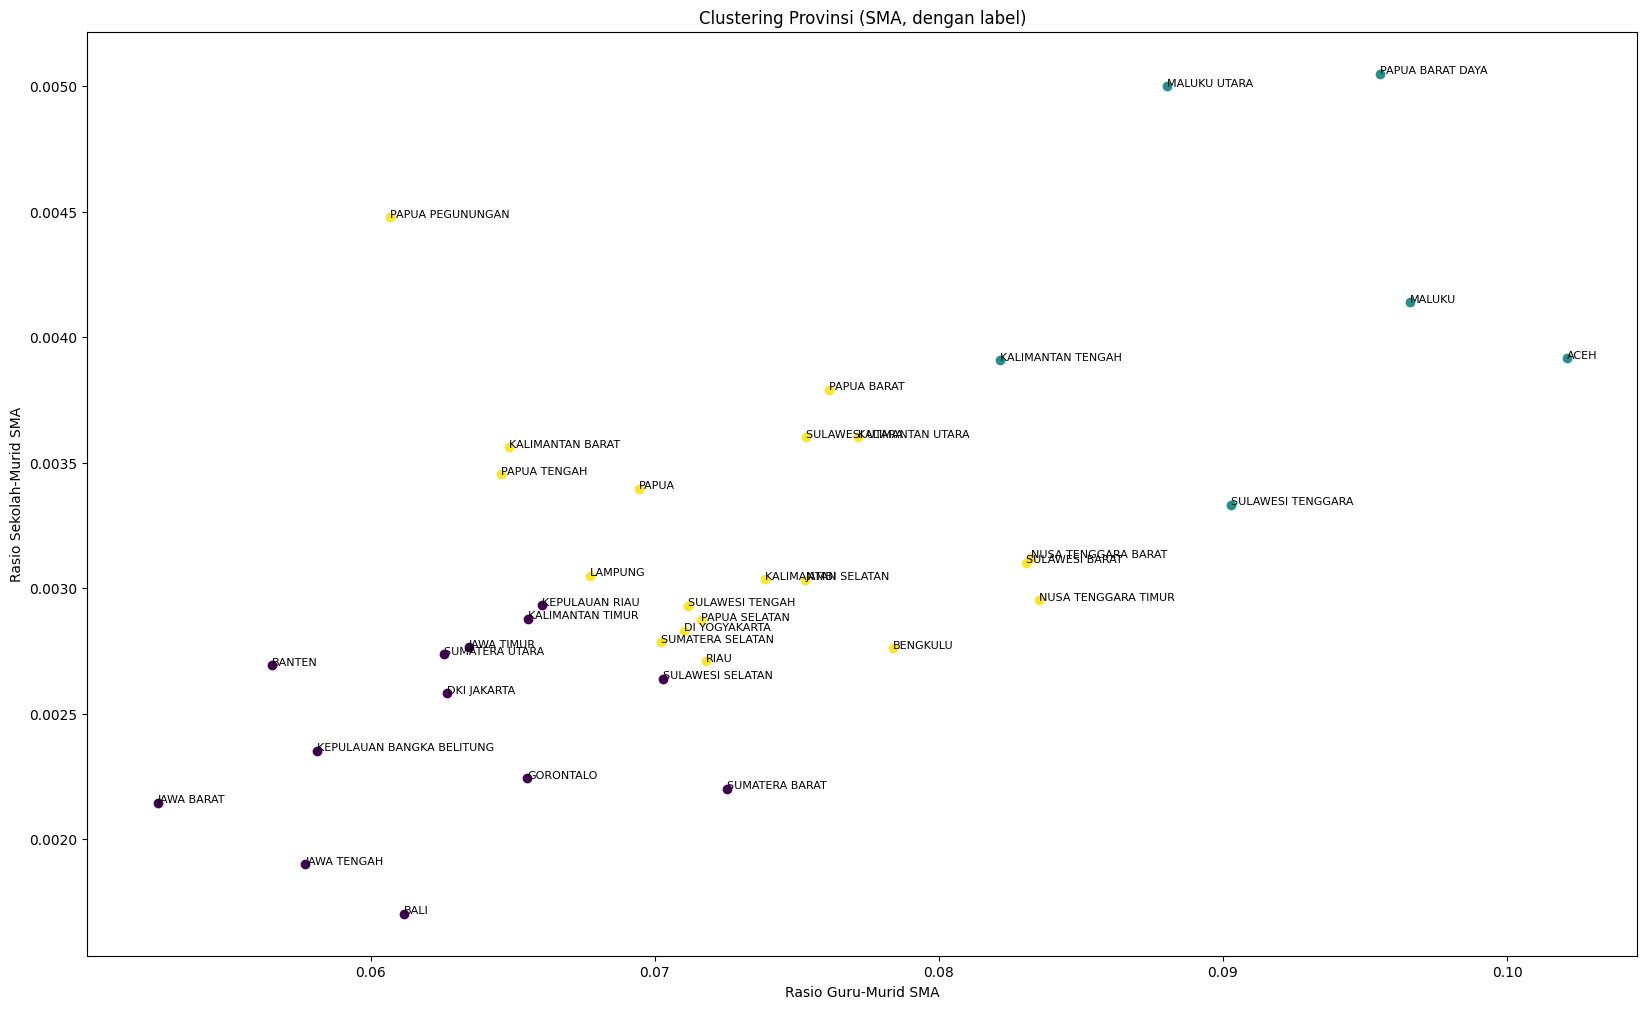

In [ ]:
# Visualisasi cluster SMA
plt.figure(figsize=(20,12))
for i in data.index:
    plt.scatter(data.loc[i, 'Rasio_Guru_Murid_SMA'], data.loc[i, 'Rasio_Sekolah_Murid_SMA'],
                c=[[plt.cm.viridis(data.loc[i, 'Cluster_SMA']/data['Cluster_SMA'].max())]])
    plt.text(data.loc[i, 'Rasio_Guru_Murid_SMA'], data.loc[i, 'Rasio_Sekolah_Murid_SMA'],
             data.loc[i, 'Provinsi'], fontsize=8)
plt.xlabel('Rasio Guru-Murid SMA')
plt.ylabel('Rasio Sekolah-Murid SMA')
plt.title('Clustering Provinsi (SMA, dengan label)')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib as mpl
# Untuk versi Matplotlib lama di Colab





Silhouette terbaik: k=2 (score=0.382)

Rata-rata per cluster (fitur terstandarisasi secara makna asli):


,Rasio_Guru_Murid_SD,Rasio_Guru_Murid_SMP,Rasio_Guru_Murid_SMA,Rasio_Sekolah_Murid_SD,Rasio_Sekolah_Murid_SMP,Rasio_Sekolah_Murid_SMA,Persen_Buta_Huruf,Jumlah_Buta_Huruf
Cluster_ALL,,,,,,,,
0,0.063269,0.066823,0.064818,0.005745,0.004086,0.002794,4.593333,388126.714286
1,0.090804,0.108022,0.082196,0.008253,0.006909,0.003501,2.600588,88770.882353



Anggota tiap cluster:

=== Cluster 0 ===
['SUMATERA UTARA', 'SUMATERA BARAT', 'RIAU', 'SUMATERA SELATAN', 'LAMPUNG', 'KEPULAUAN BANGKA BELITUNG', 'KEPULAUAN RIAU', 'DKI JAKARTA', 'JAWA BARAT', 'JAWA TENGAH', 'DI YOGYAKARTA', 'JAWA TIMUR', 'BANTEN', 'BALI', 'KALIMANTAN BARAT', 'KALIMANTAN TIMUR', 'SULAWESI SELATAN', 'PAPUA', 'PAPUA SELATAN', 'PAPUA TENGAH', 'PAPUA PEGUNUNGAN']

=== Cluster 1 ===
['ACEH', 'JAMBI', 'BENGKULU', 'NUSA TENGGARA BARAT', 'NUSA TENGGARA TIMUR', 'KALIMANTAN TENGAH', 'KALIMANTAN SELATAN', 'KALIMANTAN UTARA', 'SULAWESI UTARA', 'SULAWESI TENGAH', 'SULAWESI TENGGARA', 'GORONTALO', 'SULAWESI BARAT', 'MALUKU', 'MALUKU UTARA', 'PAPUA BARAT', 'PAPUA BARAT DAYA']


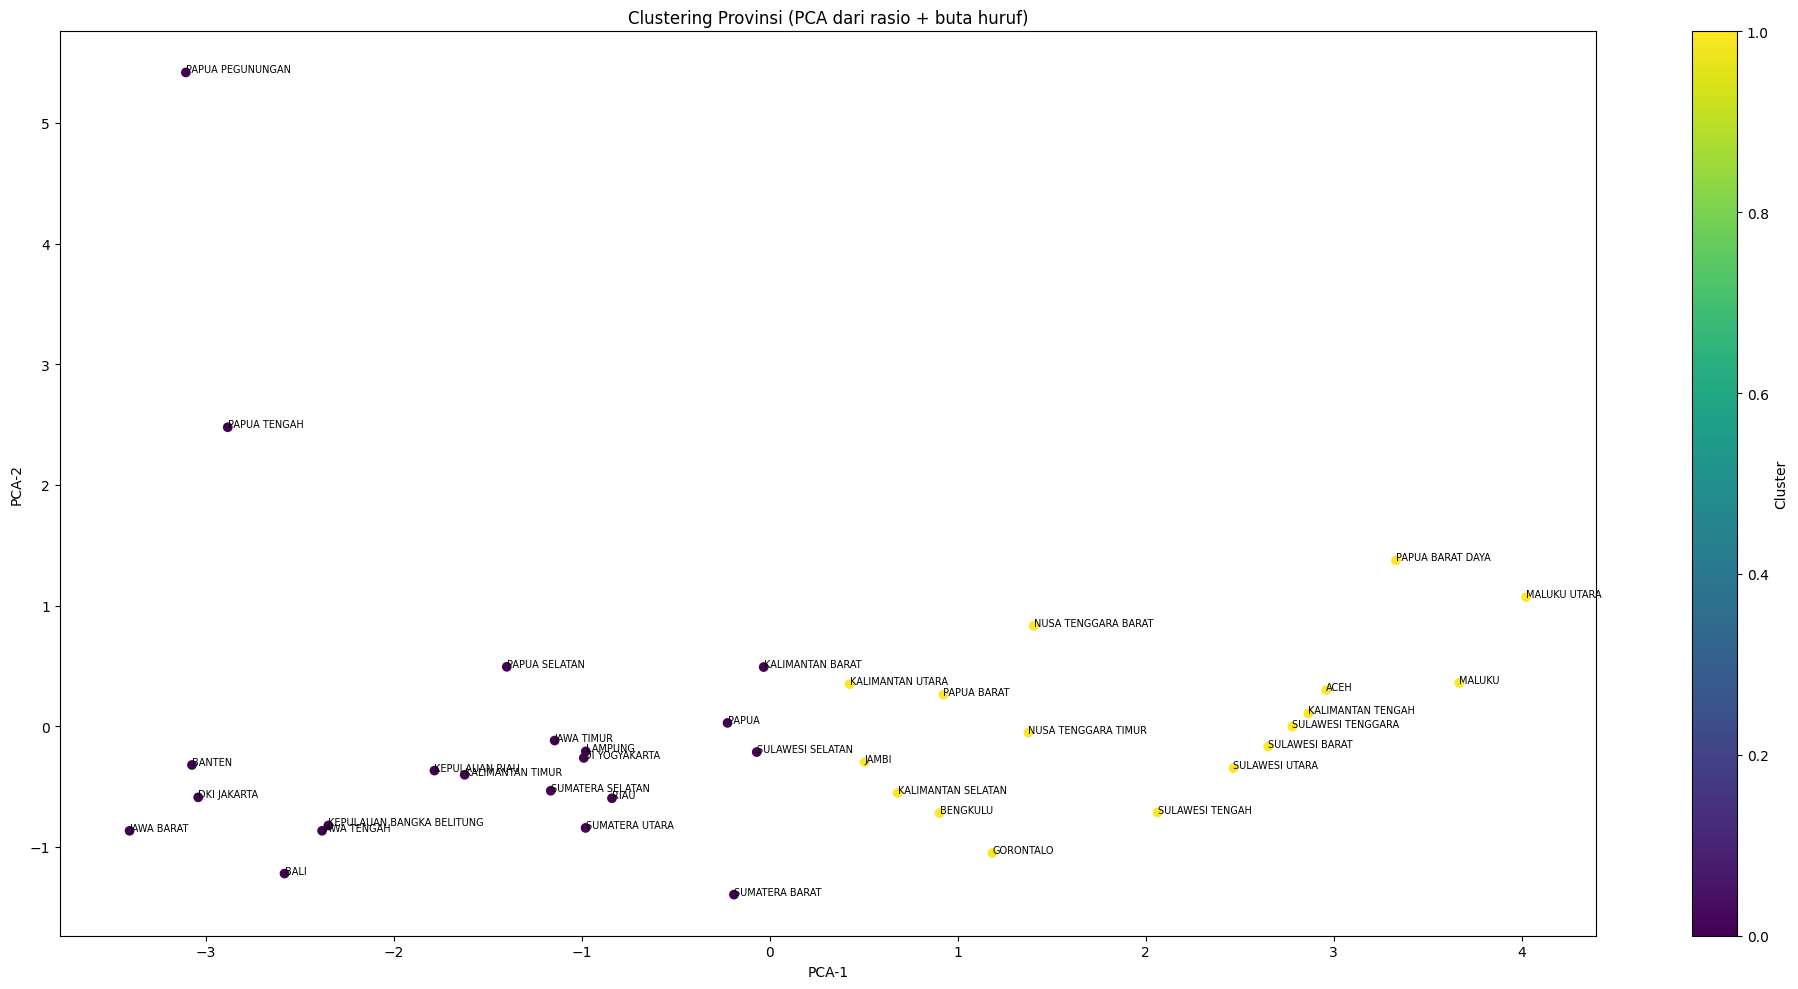

In [ ]:

fitur = [
    'Rasio_Guru_Murid_SD', 'Rasio_Guru_Murid_SMP', 'Rasio_Guru_Murid_SMA',
    'Rasio_Sekolah_Murid_SD', 'Rasio_Sekolah_Murid_SMP', 'Rasio_Sekolah_Murid_SMA',
    'Persen_Buta_Huruf'   # outcome literasi (15+)
]

X = data[fitur].copy()

# Bersihkan nilai aneh
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median(numeric_only=True))

# --- 3) Scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 4) Tentukan jumlah cluster (opsional: lihat silhouette beberapa k) ---
best_k, best_sil = None, -1
for k in (2, 3, 4, 5):
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    lbl = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, lbl)
    if sil > best_sil:
        best_k, best_sil = k, sil

print(f"Silhouette terbaik: k={best_k} (score={best_sil:.3f})")

# --- 5) K-Means final dengan k terbaik ---
kmeans = KMeans(n_clusters=best_k, n_init='auto', random_state=42)
labels = kmeans.fit_predict(X_scaled)
data['Cluster_ALL'] = labels

# --- 6) Ringkasan per cluster ---
cols_show = fitur.copy()
if 'Jumlah_Buta_Huruf' in data.columns:
    cols_show.append('Jumlah_Buta_Huruf')

print("\nRata-rata per cluster (fitur terstandarisasi secara makna asli):")
display(data.groupby('Cluster_ALL')[cols_show].mean().sort_index())

print("\nAnggota tiap cluster:")
for c in sorted(data['Cluster_ALL'].unique()):
    print(f"\n=== Cluster {c} ===")
    print(data.loc[data['Cluster_ALL'] == c, 'Provinsi'].to_list())

# --- 7) Visualisasi 2D (PCA) biar semua fitur kelihatan dalam satu scatter ---
pca = PCA(n_components=2, random_state=42)
XY = pca.fit_transform(X_scaled)

plt.figure(figsize=(20,10))
scatter = plt.scatter(XY[:,0], XY[:,1], c=data['Cluster_ALL'], cmap='viridis')
for i in data.index:
    plt.text(XY[i,0], XY[i,1], data.loc[i, 'Provinsi'], fontsize=7)
plt.title('Clustering Provinsi (PCA dari rasio + buta huruf)')
plt.xlabel('PCA-1'); plt.ylabel('PCA-2')
cbar = plt.colorbar(scatter); cbar.set_label('Cluster')
plt.tight_layout()
plt.show()

In [ ]:
# Buat ringkasan per cluster
cluster_summary = data.groupby('Cluster_ALL').agg({
    'Rasio_Guru_Murid_SD': 'mean',
    'Rasio_Guru_Murid_SMP': 'mean',
    'Rasio_Guru_Murid_SMA': 'mean',
    'Rasio_Sekolah_Murid_SD': 'mean',
    'Rasio_Sekolah_Murid_SMP': 'mean',
    'Rasio_Sekolah_Murid_SMA': 'mean',
    'Persen_Buta_Huruf': 'mean'
}).round(4).reset_index()

# Tambahkan daftar provinsi di tiap cluster
cluster_provinsi = data.groupby('Cluster_ALL')['Provinsi'].apply(list).reset_index()
cluster_summary = cluster_summary.merge(cluster_provinsi, on='Cluster_ALL')

# Tambahkan kolom rekomendasi singkat
def rekomendasi(row):
    if row['Persen_Buta_Huruf'] > data['Persen_Buta_Huruf'].mean() and \
       (row['Rasio_Guru_Murid_SD'] < data['Rasio_Guru_Murid_SD'].mean() or \
        row['Rasio_Sekolah_Murid_SD'] < data['Rasio_Sekolah_Murid_SD'].mean()):
        return "Rawan – Perlu prioritas guru/sekolah & program literasi"
    elif row['Persen_Buta_Huruf'] <= data['Persen_Buta_Huruf'].mean() and \
         (row['Rasio_Guru_Murid_SD'] >= data['Rasio_Guru_Murid_SD'].mean() and \
          row['Rasio_Sekolah_Murid_SD'] >= data['Rasio_Sekolah_Murid_SD'].mean()):
        return "Aman – Pertahankan & jadikan best practice"
    else:
        return "Sedang – Monitoring & peningkatan kualitas"

cluster_summary['Rekomendasi'] = cluster_summary.apply(rekomendasi, axis=1)

# Tampilkan hasil
pd.set_option('display.max_colwidth', None)
display(cluster_summary)


,Cluster_ALL,Rasio_Guru_Murid_SD,Rasio_Guru_Murid_SMP,Rasio_Guru_Murid_SMA,Rasio_Sekolah_Murid_SD,Rasio_Sekolah_Murid_SMP,Rasio_Sekolah_Murid_SMA,Persen_Buta_Huruf,Provinsi,Rekomendasi
0,0,0.0633,0.0668,0.0648,0.0057,0.0041,0.0028,4.5933,"[SUMATERA UTARA, SUMATERA BARAT, RIAU, SUMATERA SELATAN, LAMPUNG, KEPULAUAN BANGKA BELITUNG, KEPULAUAN RIAU, DKI JAKARTA, JAWA BARAT, JAWA TENGAH, DI YOGYAKARTA, JAWA TIMUR, BANTEN, BALI, KALIMANTAN BARAT, KALIMANTAN TIMUR, SULAWESI SELATAN, PAPUA, PAPUA SELATAN, PAPUA TENGAH, PAPUA PEGUNUNGAN]",Rawan – Perlu prioritas guru/sekolah & program literasi
1,1,0.0908,0.1080,0.0822,0.0083,0.0069,0.0035,2.6006,"[ACEH, JAMBI, BENGKULU, NUSA TENGGARA BARAT, NUSA TENGGARA TIMUR, KALIMANTAN TENGAH, KALIMANTAN SELATAN, KALIMANTAN UTARA, SULAWESI UTARA, SULAWESI TENGAH, SULAWESI TENGGARA, GORONTALO, SULAWESI BARAT, MALUKU, MALUKU UTARA, PAPUA BARAT, PAPUA BARAT DAYA]",Aman – Pertahankan & jadikan best practice


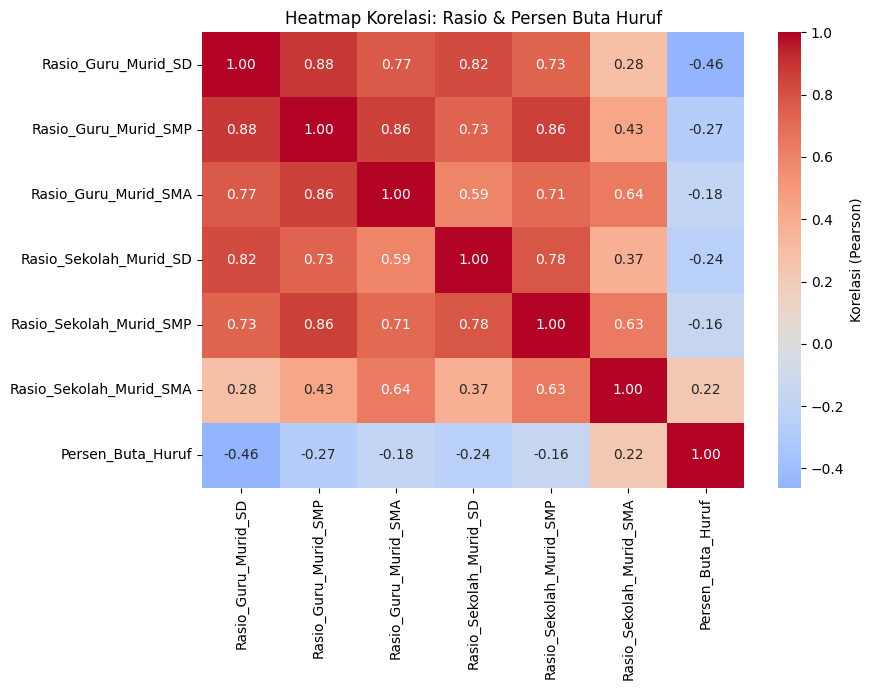

In [ ]:


# ---------- Pastikan Persen_Buta_Huruf tersedia ----------
if 'Persen_Buta_Huruf' not in data.columns:
    if 'Buta_aksara_15+' in data.columns:
        data['Persen_Buta_Huruf'] = pd.to_numeric(data['Buta_aksara_15+'], errors='coerce')
    elif {'Jumlah_Buta_Huruf','Jumlah Penduduk'}.issubset(data.columns):
        data['Persen_Buta_Huruf'] = (pd.to_numeric(data['Jumlah_Buta_Huruf'], errors='coerce') /
                                     pd.to_numeric(data['Jumlah Penduduk'], errors='coerce')) * 100
    else:
        raise ValueError("Tidak ada sumber untuk menghitung Persen_Buta_Huruf.")

# ---------- 1) Heatmap Korelasi (fokus kualitas) ----------
rasio_cols = [
    'Rasio_Guru_Murid_SD','Rasio_Guru_Murid_SMP','Rasio_Guru_Murid_SMA',
    'Rasio_Sekolah_Murid_SD','Rasio_Sekolah_Murid_SMP','Rasio_Sekolah_Murid_SMA',
    'Persen_Buta_Huruf'
]

# filter yang ada saja (kalau ada kolom yg belum dibuat)
rasio_cols = [c for c in rasio_cols if c in data.columns]
corr_matrix = data[rasio_cols].corr()

plt.figure(figsize=(9,7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            cbar_kws={'label':'Korelasi (Pearson)'})
plt.title('Heatmap Korelasi: Rasio & Persen Buta Huruf')
plt.tight_layout()
plt.show()




/tmp/ipython-input-2843282398.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', ncl)


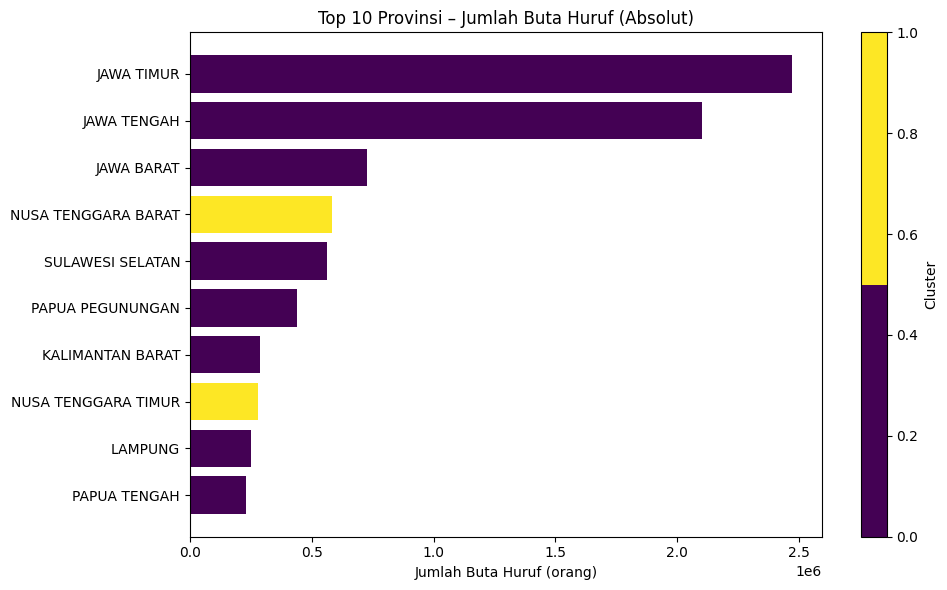

In [ ]:


# ---------- 2) Bar chart TOP 10 Jumlah Buta Huruf (absolute) ----------
if 'Jumlah_Buta_Huruf' in data.columns:
    top_buta = (data[['Provinsi', 'Jumlah_Buta_Huruf']]
                .sort_values('Jumlah_Buta_Huruf', ascending=False)
                .head(10))

    plt.figure(figsize=(10, 6))
    colors = None
    cmap = None

    if 'Cluster_ALL' in data.columns:
        # Hitung jumlah cluster
        ncl = int(data['Cluster_ALL'].nunique())
        # Gunakan colormap sesuai jumlah cluster (versi aman untuk Colab)
        cmap = plt.cm.get_cmap('viridis', ncl)
        # Ambil label cluster sesuai urutan provinsi di top_buta
        clusters = data.set_index('Provinsi').loc[top_buta['Provinsi'], 'Cluster_ALL'].values
        # Buat warna untuk setiap provinsi
        colors = [cmap(c) for c in clusters]

    # Plot bar horizontal
    plt.barh(top_buta['Provinsi'], top_buta['Jumlah_Buta_Huruf'], color=colors)
    plt.gca().invert_yaxis()
    plt.xlabel('Jumlah Buta Huruf (orang)')
    plt.title('Top 10 Provinsi – Jumlah Buta Huruf (Absolut)')

    # Tambahkan colorbar jika ada cluster
    if colors is not None and cmap is not None:
        sm = mpl.cm.ScalarMappable(cmap=cmap)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=plt.gca())
        cbar.set_label('Cluster')

    plt.tight_layout()
    plt.show()
else:
    print("Kolom 'Jumlah_Buta_Huruf' tidak ditemukan.")


/tmp/ipython-input-752937618.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap2 = plt.cm.get_cmap('viridis', ncl)


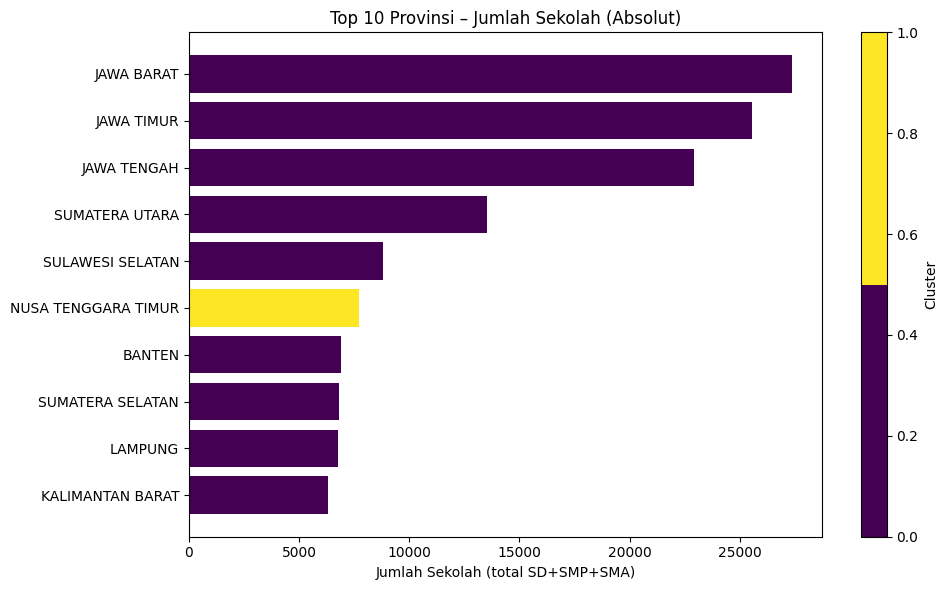

In [ ]:
# ---------- 3) Bar chart TOP 10 Jumlah Sekolah (total SD+SMP+SMA) ----------
kol_sek_sd  = 'Jumlah Sekolah SD (Negeri+Swasta)'
kol_sek_smp = 'Jumlah Sekolah SMP (Negeri+Swasta)'
kol_sek_sma = 'Jumlah Sekolah SMA (Negeri+Swasta)'

avail = [k for k in [kol_sek_sd, kol_sek_smp, kol_sek_sma] if k in data.columns]
if len(avail) == 0:
    print("Kolom jumlah sekolah tidak ditemukan.")
else:
    # hitung total sekolah
    data['Total_Sekolah'] = data[avail].sum(axis=1, numeric_only=True)

    # ambil top 10
    top_sekolah = (data[['Provinsi','Total_Sekolah']]
                   .sort_values('Total_Sekolah', ascending=False)
                   .head(10))

    plt.figure(figsize=(10,6))
    colors2, cmap2 = None, None

    if 'Cluster_ALL' in data.columns:
        ncl = int(data['Cluster_ALL'].nunique())
        # Colab-friendly
        cmap2 = plt.cm.get_cmap('viridis', ncl)

        # ambil urutan cluster mengikuti urutan provinsi di top_sekolah
        clusters = data.set_index('Provinsi').loc[top_sekolah['Provinsi'], 'Cluster_ALL'].values
        colors2 = [cmap2(c) for c in clusters]

    # plot
    plt.barh(top_sekolah['Provinsi'], top_sekolah['Total_Sekolah'], color=colors2)
    plt.gca().invert_yaxis()
    plt.xlabel('Jumlah Sekolah (total SD+SMP+SMA)')
    plt.title('Top 10 Provinsi – Jumlah Sekolah (Absolut)')

    if colors2 is not None and cmap2 is not None:
        sm2 = mpl.cm.ScalarMappable(cmap=cmap2)
        sm2.set_array([])
        # tempelkan colorbar ke axes aktif → tidak error
        cbar2 = plt.colorbar(sm2, ax=plt.gca())
        cbar2.set_label('Cluster')

    plt.tight_layout()
    plt.show()

/tmp/ipython-input-711067719.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', ncl)


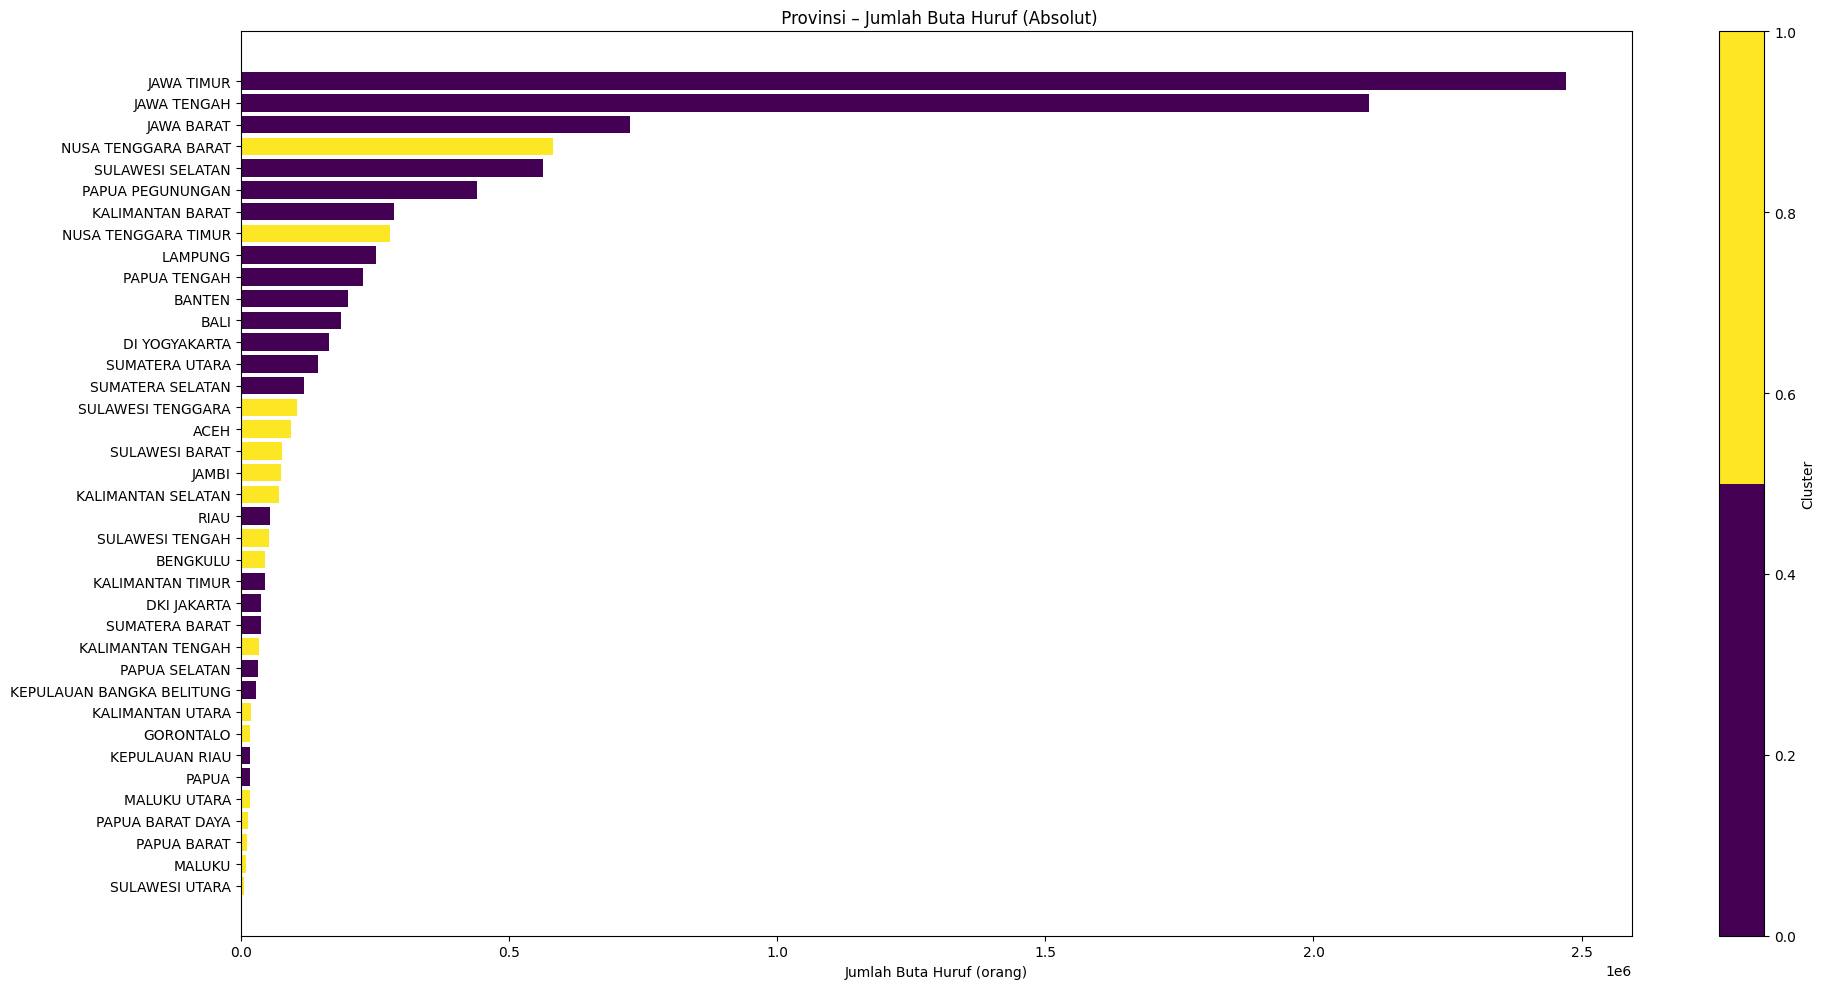

In [ ]:

if 'Jumlah_Buta_Huruf' in data.columns:
    top_buta = (data[['Provinsi', 'Jumlah_Buta_Huruf']]
                .sort_values('Jumlah_Buta_Huruf', ascending=False)
                )

    plt.figure(figsize=(20, 10))
    colors = None
    cmap = None

    if 'Cluster_ALL' in data.columns:
        # Hitung jumlah cluster
        ncl = int(data['Cluster_ALL'].nunique())
        # Gunakan colormap sesuai jumlah cluster (versi aman untuk Colab)
        cmap = plt.cm.get_cmap('viridis', ncl)
        # Ambil label cluster sesuai urutan provinsi di top_buta
        clusters = data.set_index('Provinsi').loc[top_buta['Provinsi'], 'Cluster_ALL'].values
        # Buat warna untuk setiap provinsi
        colors = [cmap(c) for c in clusters]

    # Plot bar horizontal
    plt.barh(top_buta['Provinsi'], top_buta['Jumlah_Buta_Huruf'], color=colors)
    plt.gca().invert_yaxis()
    plt.xlabel('Jumlah Buta Huruf (orang)')
    plt.title(' Provinsi – Jumlah Buta Huruf (Absolut)')

    # Tambahkan colorbar jika ada cluster
    if colors is not None and cmap is not None:
        sm = mpl.cm.ScalarMappable(cmap=cmap)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=plt.gca())
        cbar.set_label('Cluster')

    plt.tight_layout()
    plt.show()
else:
    print("Kolom 'Jumlah_Buta_Huruf' tidak ditemukan.")


/tmp/ipython-input-2813828911.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap2 = plt.cm.get_cmap('viridis', ncl)


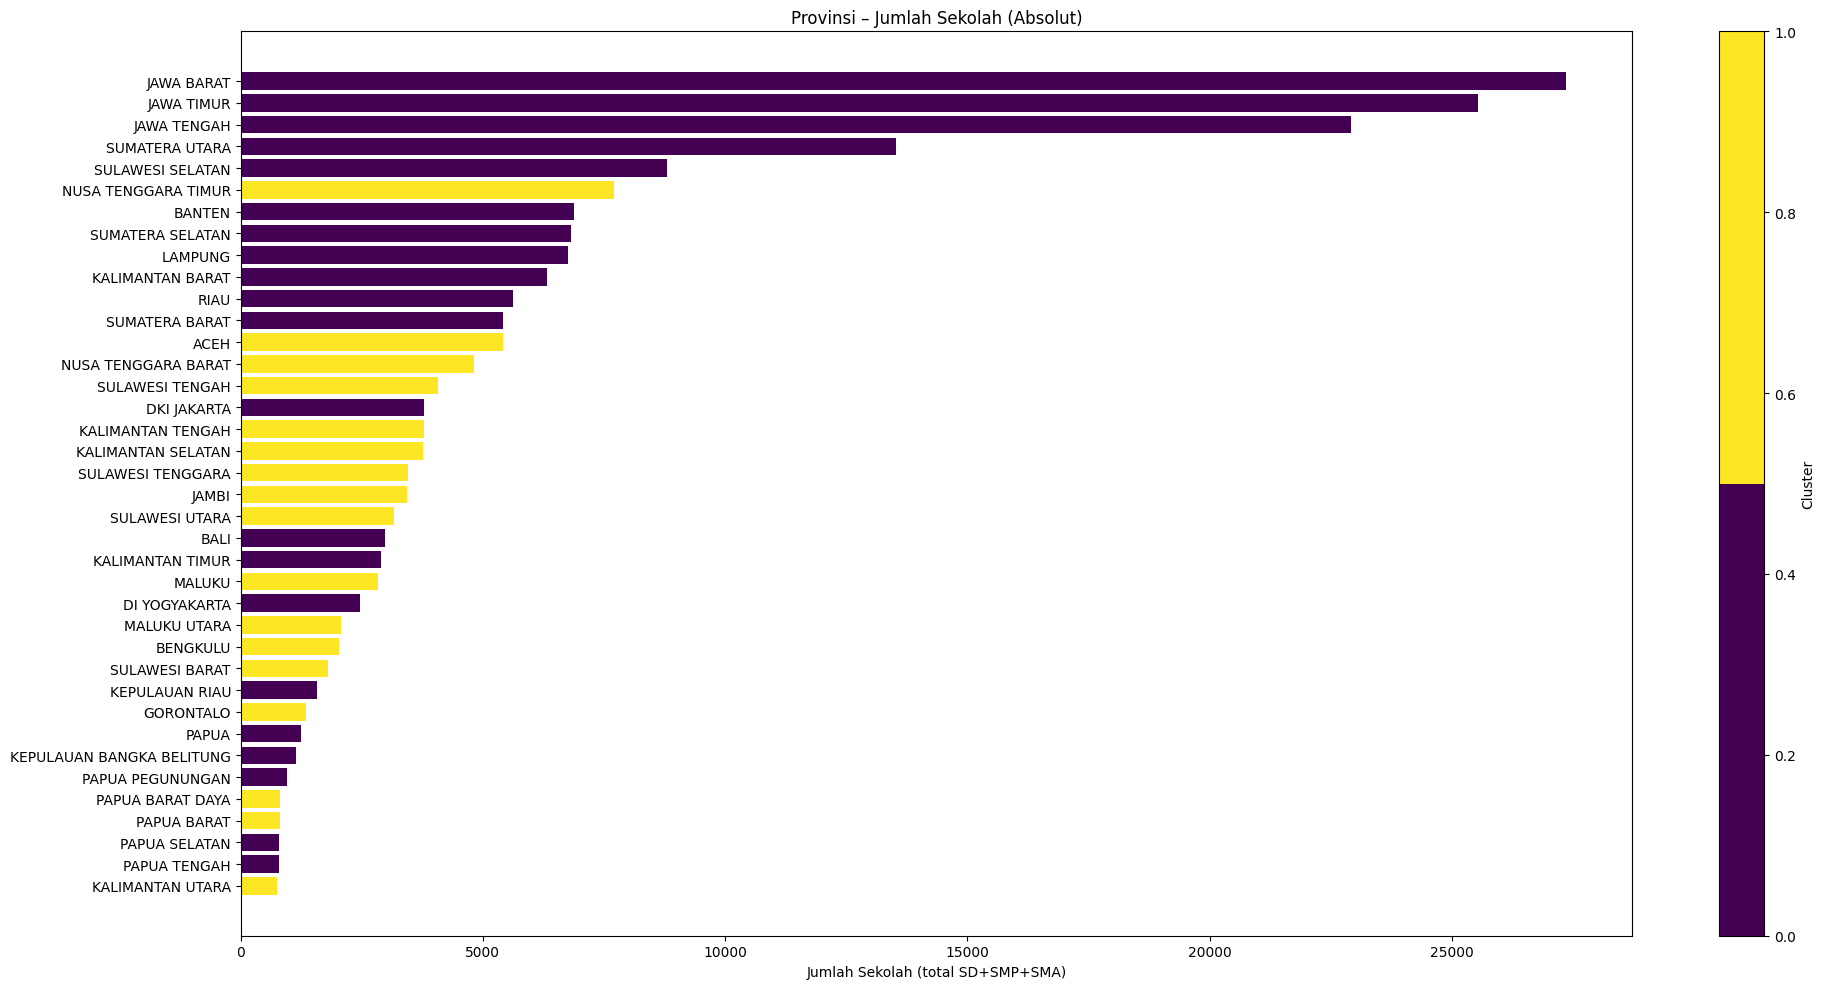

In [ ]:
kol_sek_sd  = 'Jumlah Sekolah SD (Negeri+Swasta)'
kol_sek_smp = 'Jumlah Sekolah SMP (Negeri+Swasta)'
kol_sek_sma = 'Jumlah Sekolah SMA (Negeri+Swasta)'

avail = [k for k in [kol_sek_sd, kol_sek_smp, kol_sek_sma] if k in data.columns]
if len(avail) == 0:
    print("Kolom jumlah sekolah tidak ditemukan.")
else:
    # hitung total sekolah
    data['Total_Sekolah'] = data[avail].sum(axis=1, numeric_only=True)

    # ambil top 10
    top_sekolah = (data[['Provinsi','Total_Sekolah']]
                   .sort_values('Total_Sekolah', ascending=False))

    plt.figure(figsize=(20,10))
    colors2, cmap2 = None, None

    if 'Cluster_ALL' in data.columns:
        ncl = int(data['Cluster_ALL'].nunique())
        # Colab-friendly
        cmap2 = plt.cm.get_cmap('viridis', ncl)

        # ambil urutan cluster mengikuti urutan provinsi di top_sekolah
        clusters = data.set_index('Provinsi').loc[top_sekolah['Provinsi'], 'Cluster_ALL'].values
        colors2 = [cmap2(c) for c in clusters]

    # plot
    plt.barh(top_sekolah['Provinsi'], top_sekolah['Total_Sekolah'], color=colors2)
    plt.gca().invert_yaxis()
    plt.xlabel('Jumlah Sekolah (total SD+SMP+SMA)')
    plt.title('Provinsi – Jumlah Sekolah (Absolut)')

    if colors2 is not None and cmap2 is not None:
        sm2 = mpl.cm.ScalarMappable(cmap=cmap2)
        sm2.set_array([])
        # tempelkan colorbar ke axes aktif → tidak error
        cbar2 = plt.colorbar(sm2, ax=plt.gca())
        cbar2.set_label('Cluster')

    plt.tight_layout()
    plt.show()

#Kesimpulan :


Penelitian ini berhasil mengimplementasikan pendekatan
data mining berbasis teknik clustering K-Means untuk
mengidentifikasi wilayah rawan buta huruf di Indonesia
berdasarkan indikator rasio guru-murid dan infrastruktur
pendidikan. Hasil analisis menunjukkan bahwa 38 provinsi di
Indonesia dapat dikelompokkan ke dalam dua klaster utama
dengan karakteristik yang berbeda secara signifikan.
Cluster 0 (Rawan) mencakup 21 provinsi dengan rata-rata
rasio guru-murid yang rendah (0,0633 untuk SD, 0,0668 untuk
SMP, dan 0,0648 untuk SMA) serta tingkat buta huruf yang
tinggi (4,59%). Provinsi-provinsi dalam klaster ini, termasuk
wilayah Jawa, Sumatera, dan Papua, memerlukan prioritas
peningkatan ketersediaan guru, pemerataan fasilitas sekolah,
dan program literasi yang intensif.
Cluster 1 (Aman) terdiri dari 17 provinsi dengan kondisi
pendidikan yang lebih baik, ditandai dengan rasio guru-murid
yang optimal (0,0908 untuk SD, 0,1080 untuk SMP, dan 0,0822
untuk SMA) dan tingkat buta huruf yang rendah (2,60%).
Wilayah-wilayah ini dapat dijadikan model best practice dalam
pengembangan pendidikan nasional.
Visualisasi spasial melalui pemetaan klaster memberikan
gambaran komprehensif tentang distribusi geografis masalah
pendidikan di Indonesia. Hasil ini menunjukkan bahwa
ketersediaan infrastruktur pendidikan bukan satu-satunya faktor
penentu tingkat literasi, melainkan juga dipengaruhi oleh aspek
aksesibilitas, kualitas pendidikan, dan kondisi sosial-ekonomi
masyarakat.

